In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt

In [87]:
df=pd.DataFrame([
    {"Hours":10,"GPA":3.1},{"Hours":8,"GPA":2.1},{"Hours":5,"GPA":1.1},{"Hours":6,"GPA":1.4},{"Hours":1,"GPA":0.4},
     {"Hours":10,"GPA":3.1},{"Hours":8,"GPA":2.1},{"Hours":5,"GPA":1.1},{"Hours":6,"GPA":1.4},{"Hours":1,"GPA":0.4},
     {"Hours":10,"GPA":3.1},{"Hours":8,"GPA":2.1},{"Hours":5,"GPA":1.1},{"Hours":6,"GPA":1.4},{"Hours":1,"GPA":0.4},
     {"Hours":10,"GPA":3.1},{"Hours":8,"GPA":2.1},{"Hours":5,"GPA":1.1},{"Hours":6,"GPA":1.4},{"Hours":1,"GPA":0.4}
])

In [88]:
df.head()

,Hours,GPA
0,10,3.1
1,8,2.1
2,5,1.1
3,6,1.4
4,1,0.4


In [89]:
df.to_csv('Hoursvsgpa.csv')

In [90]:
df=pd.read_csv('Hoursvsgpa.csv')

In [91]:
df.shape

(20, 3)

In [92]:
df.corr()

,Unnamed: 0,Hours,GPA
Unnamed: 0,1.000000,-0.228702,-0.230081
Hours,-0.228702,1.000000,0.968027
GPA,-0.230081,0.968027,1.000000


In [93]:
df.describe()

,Unnamed: 0,Hours,GPA
count,20.00000,20.000000,20.000000
mean,9.50000,6.000000,1.620000
std,5.91608,3.111946,0.943454
min,0.00000,1.000000,0.400000
25%,4.75000,5.000000,1.100000
50%,9.50000,6.000000,1.400000
75%,14.25000,8.000000,2.100000
max,19.00000,10.000000,3.100000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20 non-null     int64  
 1   Hours       20 non-null     int64  
 2   GPA         20 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 608.0 bytes


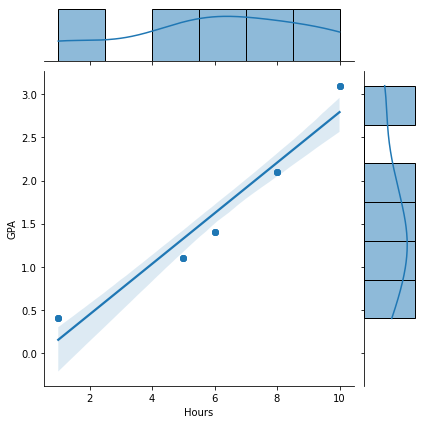

In [95]:
sns.jointplot(x=df['Hours'], y=df['GPA'], data=df, kind='reg')

In [96]:
# Separate the input features (predictors) and the target variable
x = df['Hours']
y = df['GPA']

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert the input features and target variables to numpy arrays and reshape them
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)


print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (16, 1)
Test - Predictors shape (4, 1)
Train - Target shape (16, 1)
Test - Target shape (4, 1)


In [98]:
cls = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model
cls.fit(x_train,y_train)

LinearRegression()

In [99]:
prediction = cls.predict(x_test)

In [100]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [[0.27503303]]


In [101]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model [-0.05799207]


In [102]:
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

Mean Square Error 0.0953318477128482


Text(0.5, 1.0, 'Linear Regression')

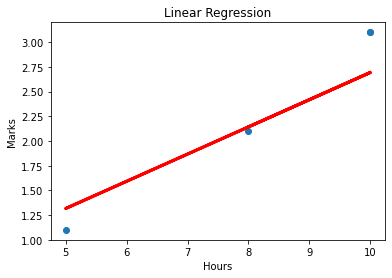

In [103]:
#Model Regression line on test set
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.title('Linear Regression')

In [104]:
def simple_linear_regression(X, y):
    # Calculate the mean of the input feature and target variables
    mean_X = np.mean(X)
    mean_y = np.mean(y)

    # Calculate the slope (theta_1) and the intercept (theta_0) of the regression line
    numerator = np.sum((X - mean_X) * (y - mean_y))
    denominator = np.sum((X - mean_X) ** 2)
    theta_1 = numerator / denominator
    theta_0 = mean_y - theta_1 * mean_X

    return theta_0, theta_1

In [105]:
def predict(X, theta_0, theta_1):
    # Make predictions using the learned parameters
    return theta_0 + theta_1 * X

In [106]:
def mse_calc(prediction, y_test):
    #
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error

In [107]:
def rsq(prediction, y_test):
    #
    total_data = len(prediction)
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    #
    r2 = 1 - (res_err / tot_err)
    return r2

/var/folders/sj/kjrbr97x2w37jfp85085rwxc0000gn/T/ipykernel_1368/2222527584.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


100 epochs elapsed
Current accuracy is : 0.9836456109008862
Do you want to stop (y/*)??y


/var/folders/sj/kjrbr97x2w37jfp85085rwxc0000gn/T/ipykernel_1368/2222527584.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/var/folders/sj/kjrbr97x2w37jfp85085rwxc0000gn/T/ipykernel_1368/2222527584.py:92: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()


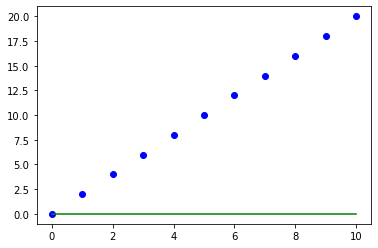

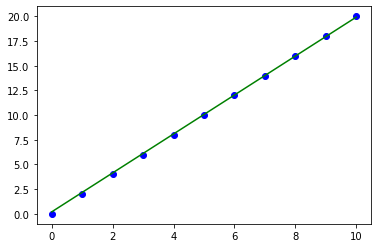

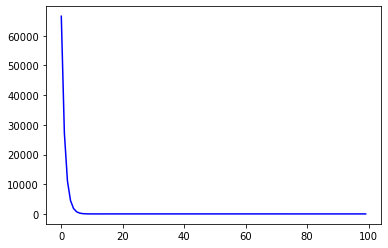

In [108]:
# Implementation of gradient descent in linear regression
import numpy as np
import matplotlib.pyplot as plt
 
 
class Linear_Regression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.b = [0, 0]
 
    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        Y = self.Y
        m = len(Y)
        self.b[0] = self.b[0] - (learning_rate * ((1/m) *
                                                  np.sum(Y_pred - Y)))
 
        self.b[1] = self.b[1] - (learning_rate * ((1/m) *
                                                  np.sum((Y_pred - Y) * self.X)))
 
    def predict(self, X=[]):
        Y_pred = np.array([])
        if not X:
            X = self.X
        b = self.b
        for x in X:
            Y_pred = np.append(Y_pred, b[0] + (b[1] * x))
 
        return Y_pred
 
    def get_current_accuracy(self, Y_pred):
        p, e = Y_pred, self.Y
        n = len(Y_pred)
        return 1-sum(
            [
                abs(p[i]-e[i])/e[i]
                for i in range(n)
                if e[i] != 0]
        )/n
    # def predict(self, b, yi):
 
    def compute_cost(self, Y_pred):
        m = len(self.Y)
        J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
        return J
 
    def plot_best_fit(self, Y_pred, fig):
        f = plt.figure(fig)
        plt.scatter(self.X, self.Y, color='b')
        plt.plot(self.X, Y_pred, color='g')
        f.show()
 
 
def main():
    X = np.array([i for i in range(11)])
    Y = np.array([2*i for i in range(11)])
 
    regressor = Linear_Regression(X, Y)
 
    iterations = 0
    steps = 100
    learning_rate = 0.01
    costs = []
 
    # original best-fit line
    Y_pred = regressor.predict()
    regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')
 
    while 1:
        Y_pred = regressor.predict()
        cost = regressor.compute_cost(Y_pred)
        costs.append(cost)
        regressor.update_coeffs(learning_rate)
 
        iterations += 1
        if iterations % steps == 0:
            print(iterations, "epochs elapsed")
            print("Current accuracy is :",
                  regressor.get_current_accuracy(Y_pred))
 
            stop = input("Do you want to stop (y/*)??")
            if stop == "y":
                break
 
    # final best-fit line
    regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')
 
    # plot to verify cost function decreases
    h = plt.figure('Verification')
    plt.plot(range(iterations), costs, color='b')
    h.show()
 
    # if user wants to predict using the regressor:
    regressor.predict([i for i in range(10)])
 
 
if __name__ == '__main__':
    main()